In [2]:
import pandas as pd
import os

# Ruta al dataset externo
ruta_datos = "/home/samuel/Documentos/datos/Phones_gyroscope.csv"

# Cargar el dataset
df = pd.read_csv(ruta_datos)
df.head()


,Index,Arrival_Time,Creation_Time,x,y,z,User,Model,Device,gt
0,0,1424696633909,1424696631914042029,0.013748,-0.000626,-0.023376,a,nexus4,nexus4_1,stand
1,1,1424696633909,1424696631919046912,0.014816,-0.001694,-0.022308,a,nexus4,nexus4_1,stand
2,2,1424696633918,1424696631924051794,0.015884,-0.001694,-0.021240,a,nexus4,nexus4_1,stand
3,3,1424696633919,1424696631929117712,0.016953,-0.003830,-0.020172,a,nexus4,nexus4_1,stand
4,4,1424696633928,1424696631934214148,0.015884,-0.007034,-0.020172,a,nexus4,nexus4_1,stand


In [3]:
# Dimensiones y tipos de datos
print("Dimensiones del dataset:", df.shape)
print("\nTipos de datos:")
print(df.dtypes)

# Valores nulos
print("\nValores nulos por columna:")
print(df.isnull().sum())

# Resumen estadístico
df.describe()


Dimensiones del dataset: (13932632, 10)

Tipos de datos:
Index              int64
Arrival_Time       int64
Creation_Time      int64
x                float64
y                float64
z                float64
User              object
Model             object
Device            object
gt                object
dtype: object

Valores nulos por columna:
Index                  0
Arrival_Time           0
Creation_Time          0
x                      0
y                      0
z                      0
User                   0
Model                  0
Device                 0
gt               1869627
dtype: int64


,Index,Arrival_Time,Creation_Time,x,y,z
count,1.393263e+07,1.393263e+07,1.393263e+07,1.393263e+07,1.393263e+07,1.393263e+07
mean,1.656943e+05,1.424744e+12,6.382965e+17,3.315133e-03,-9.459769e-03,-8.930509e-03
std,1.035116e+05,4.401267e+07,7.084178e+17,4.472657e-01,4.498820e-01,5.141587e-01
min,0.000000e+00,1.424687e+12,1.019237e+12,-4.128174e+00,-7.992025e+00,-5.278381e+00
25%,7.698800e+04,1.424697e+12,1.367526e+14,-1.252274e-01,-1.294556e-01,-1.788367e-01
50%,1.562920e+05,1.424777e+12,3.499154e+14,3.509521e-04,-2.243042e-03,-7.781982e-04
75%,2.518360e+05,1.424783e+12,1.424777e+18,1.432479e-01,1.101379e-01,1.378482e-01
max,4.001130e+05,1.424789e+12,1.424791e+18,9.088684e+00,1.434764e+01,5.936013e+00


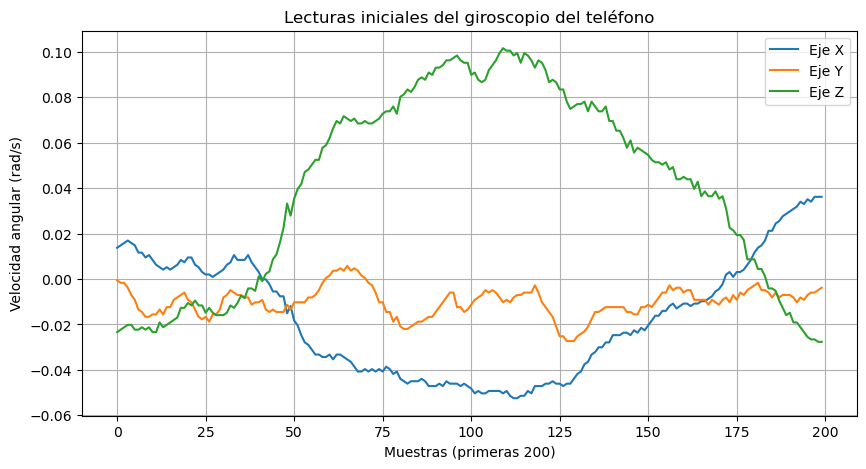

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(df['x'][:200], label='Eje X')
plt.plot(df['y'][:200], label='Eje Y')
plt.plot(df['z'][:200], label='Eje Z')
plt.title("Lecturas iniciales del giroscopio del teléfono")
plt.xlabel("Muestras (primeras 200)")
plt.ylabel("Velocidad angular (rad/s)")
plt.legend()
plt.grid(True)
plt.show()


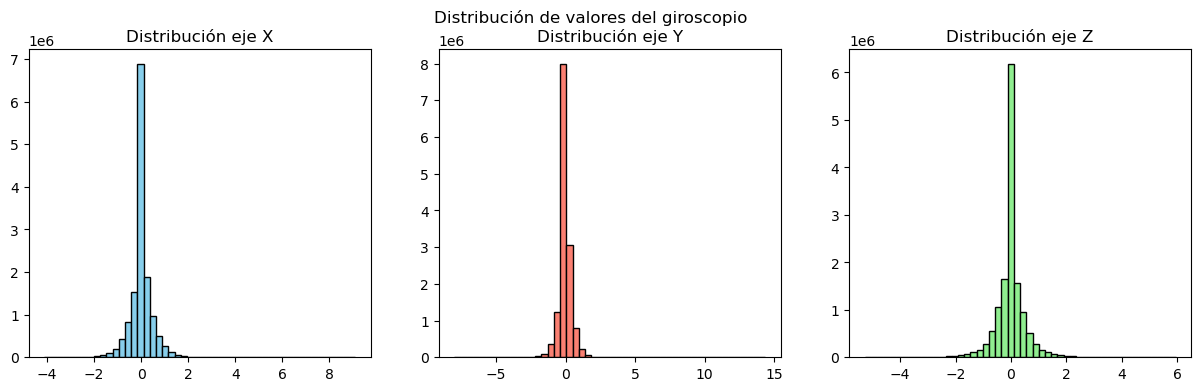

In [5]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
axes[0].hist(df['x'], bins=50, color='skyblue', edgecolor='black')
axes[0].set_title('Distribución eje X')

axes[1].hist(df['y'], bins=50, color='salmon', edgecolor='black')
axes[1].set_title('Distribución eje Y')

axes[2].hist(df['z'], bins=50, color='lightgreen', edgecolor='black')
axes[2].set_title('Distribución eje Z')

plt.suptitle('Distribución de valores del giroscopio')
plt.show()


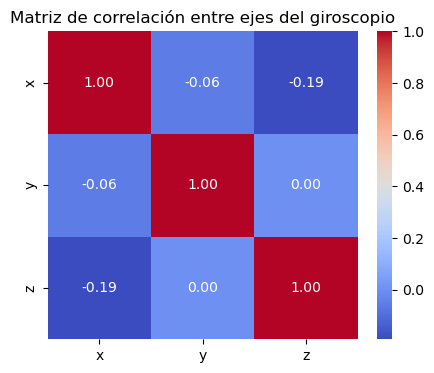

In [6]:
import seaborn as sns

corr = df[['x','y','z']].corr()
plt.figure(figsize=(5,4))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de correlación entre ejes del giroscopio")
plt.show()


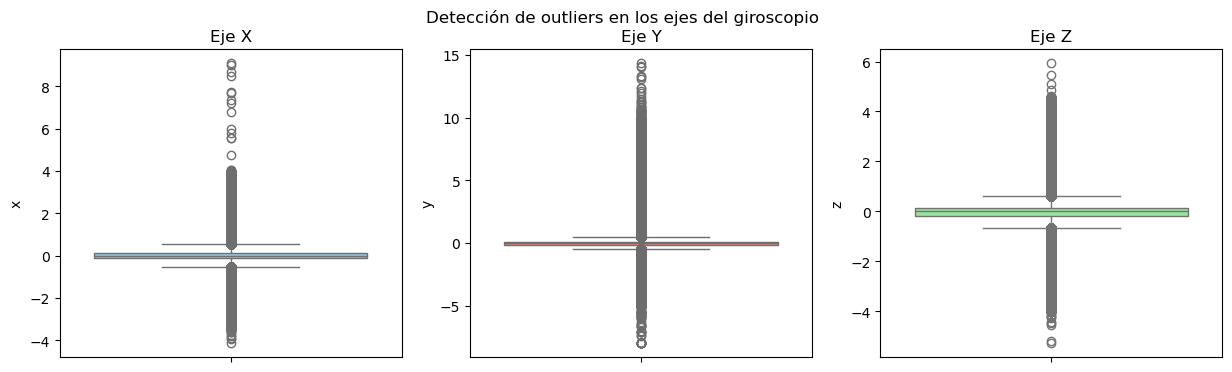

In [7]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

sns.boxplot(y=df['x'], ax=axes[0], color='skyblue')
axes[0].set_title('Eje X')

sns.boxplot(y=df['y'], ax=axes[1], color='salmon')
axes[1].set_title('Eje Y')

sns.boxplot(y=df['z'], ax=axes[2], color='lightgreen')
axes[2].set_title('Eje Z')

plt.suptitle('Detección de outliers en los ejes del giroscopio')
plt.show()


In [8]:
df.groupby('gt')[['x', 'y', 'z']].mean()


,x,y,z
gt,,,
bike,0.023809,-0.013433,-0.081294
sit,0.000177,-0.002490,0.001927
stairsdown,0.019194,-0.033548,0.104533
stairsup,-0.010615,-0.012951,-0.087916
stand,0.000311,-0.002262,0.001737
walk,-0.000729,-0.002780,0.000754
